In [1]:
import sys
sys.path.insert(0, "..")
from classes.stat_phys.potentials import MD_Simulator
import matplotlib.pyplot as plt
import numpy as np
plt.rc('animation', html='jshtml')

In [2]:
def proposal_func(x, x_min=-0.5, x_max=0.5):
    return x + np.random.uniform(x_min, x_max)

m = 1.0
w = 1.0
v_func = lambda x: 1.0/2.0*m*w**2*x**2
acc_func = lambda x: -m*w**2*x
md_simulator = MD_Simulator(temp=0.15, v_func=v_func, acc_func=acc_func)

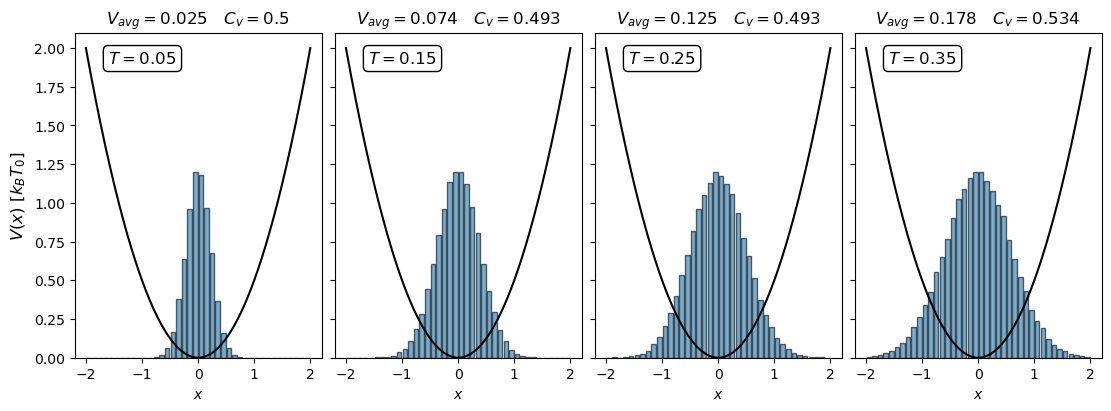

In [16]:
fig, axs = plt.subplots(1,4, figsize=(11,4), sharey=True, layout="constrained")
axs[0].set_ylabel(r"$V(x)$"+r" $\left[k_{B}T_{0}\right]$", fontsize=12)
for ax, temp in zip(axs.flatten(), [0.05, 0.15, 0.25, 0.35]):
    ax.set_xlabel(r"$x$")
    md_simulator.temp = temp
    ax.annotate(text=r"$T = $"+f"{temp}", xy=(-1.6, 1.9), fontsize=12, bbox=dict(boxstyle="round", fc="w"))
    result = md_simulator.run_metropolis_montecarlo(N_points=100000, x_init=0.0, proposal_func=proposal_func)
    md_simulator.plot(ax=ax, x_distribution=result, bin_size=0.1)

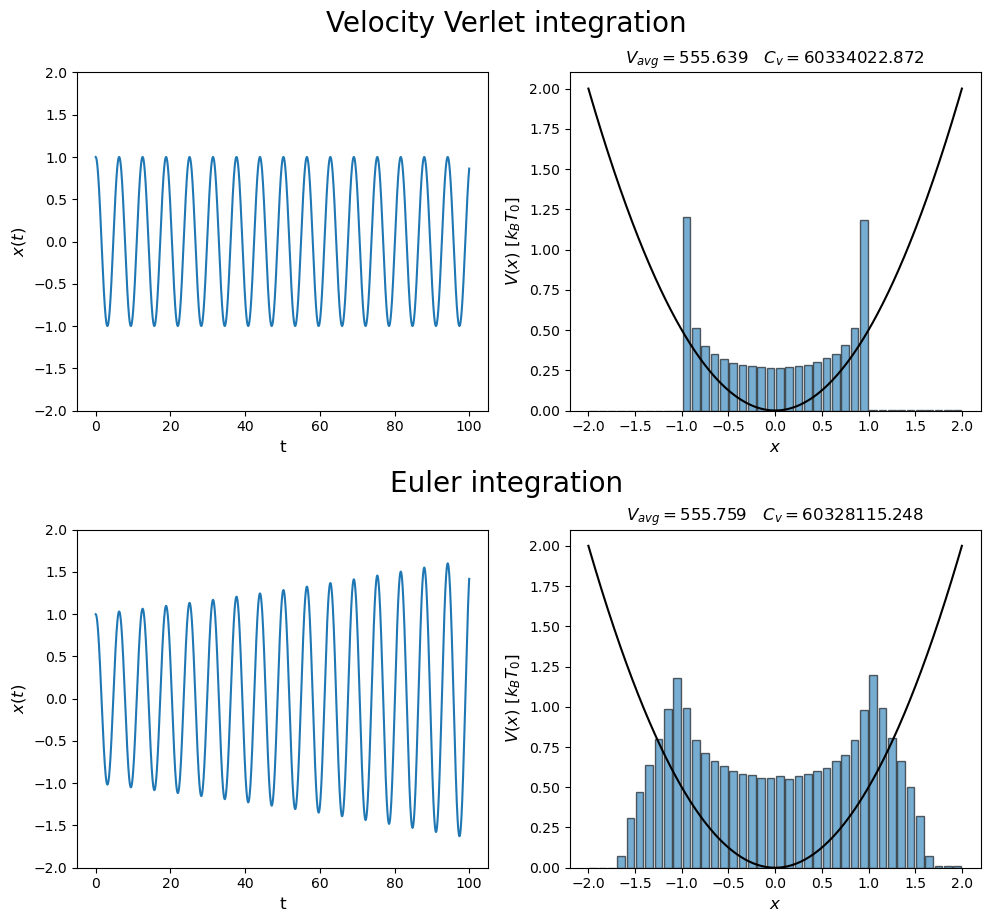

In [66]:
fig, axs = plt.subplots(2,2, figsize=(10,10))

for ax_row in axs:
    ax_row[0].set_xlabel("t", fontsize=12)
    ax_row[0].set_ylabel(r"$x(t)$", fontsize=12)
    ax_row[1].set_ylabel(r"$V(x)$"+r" $\left[k_{B}T_{0}\right]$", fontsize=12)
    ax_row[1].set_xlabel(r"$x$", fontsize=12)

fig.text(0.5, 0.92, "Velocity Verlet integration", ha="center", fontsize=20)
fig.text(0.5, 0.92/2, "Euler integration", ha="center", fontsize=20)
fig.tight_layout(h_pad=5.0, rect=[0, 0.025, 1.0, 0.9])
methods = ["verlet_integrate", "euler_integrate"]

for ax, method in zip(axs, methods):
    result = md_simulator.run_N2_integration(N_steps=10000, x_init=1.0, v_init=0.0, t_init=0.0, method=method)
    ax[0].plot(result[:,0],result[:,1])
    ax[0].set_ylim([-2,2])
    md_simulator.plot(ax=ax[1], x_distribution=result, bin_size=0.1)

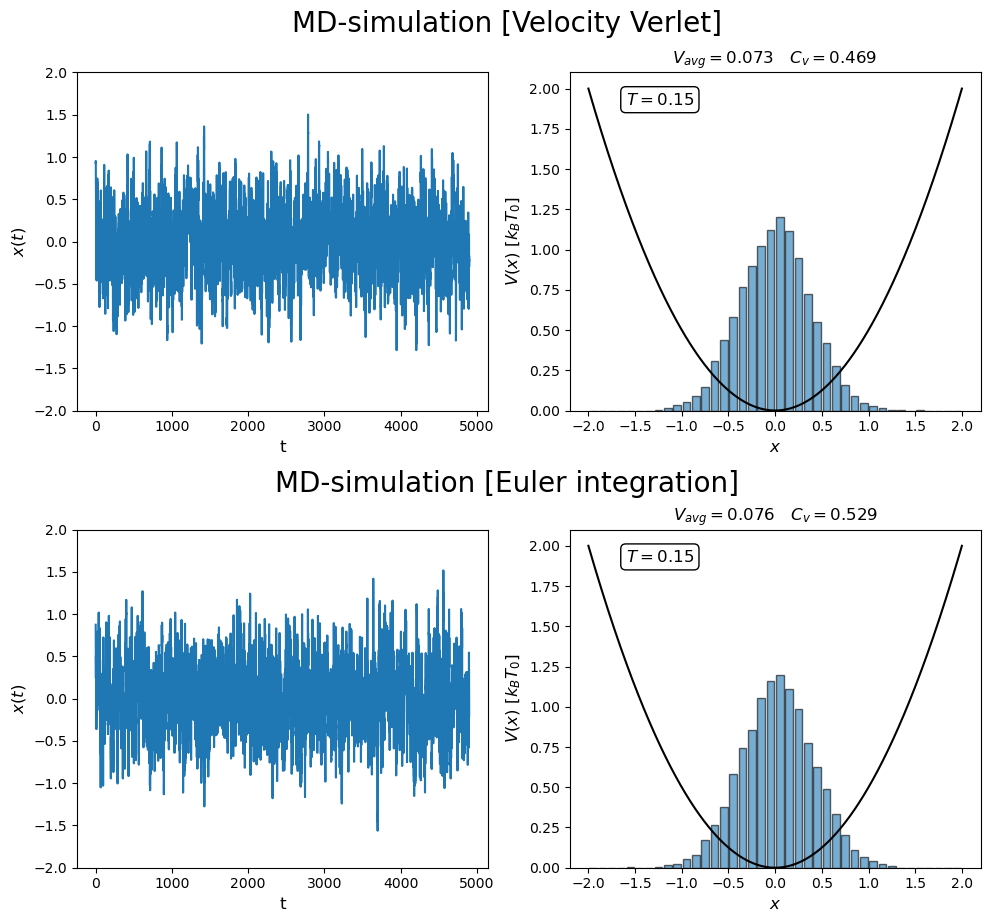

In [71]:
fig, axs = plt.subplots(2,2, figsize=(10,10))

for ax_row in axs:
    ax_row[0].set_xlabel("t", fontsize=12)
    ax_row[0].set_ylabel(r"$x(t)$", fontsize=12)
    ax_row[1].set_ylabel(r"$V(x)$"+r" $\left[k_{B}T_{0}\right]$", fontsize=12)
    ax_row[1].set_xlabel(r"$x$", fontsize=12)

fig.text(0.5, 0.92, "MD-simulation [Velocity Verlet]", ha="center", fontsize=20)
fig.text(0.5, 0.92/2, "MD-simulation [Euler integration]", ha="center", fontsize=20)
fig.tight_layout(h_pad=5.0, rect=[0, 0.025, 1.0, 0.9])
methods = ["verlet_integrate", "euler_integrate"]
md_simulator.temp=0.15
for ax, method in zip(axs, methods):
    ax[1].annotate(text=r"$T = $"+f"{0.15}", xy=(-1.6, 1.9), fontsize=12, bbox=dict(boxstyle="round", fc="w"))
    result = md_simulator.run_md_simulation(N_steps=10000, x_init=1.0, v_init=0.0, t_init=0.0, method=method, integrate_steps=50)
    ax[0].plot(result[:,0],result[:,1])
    ax[0].set_ylim([-2,2])
    md_simulator.plot(ax=ax[1], x_distribution=result[:,1], bin_size=0.1)